# **Intelligent Systems**

# Load data

In [ ]:
# Import libraries
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# mount Google Drive
drive.mount('/content/drive')
# Read file and store into Pandas dataframe
df = pd.read_excel('/content/drive/MyDrive/csv_files/Data_CN7050.xlsx')
df.head()

Mounted at /content/drive


,Site number,Patient number,Patient id in former eCRF,Date of consent,Inclusion criteria,First name,Last name,Gender,Birth date,Patient code in the center,Date of referral in the center,Height,Weight,Date of creation of patient,Did the patient have pre-colectomy therapy (radiotherapy excluded),Specify,Did the patient have pre-colectomy radiotherapy,Laparoscopic resection,Date of first colectomy,Tumor,Node,Metastasis,Number of resected lymph nodes,Number of resected lymph nodes.1,Number of metastatic lymph nodes,Number of metastatic lymph nodes.1,Tumor margin (rectal tumor only),EGFR amplification,Other mutation,Which,Microsatellite,Diagnosis date,Synchronicity of colorectal cancer,Number of hepatic metastases,Number of hepatic metastases.1,Hepatic metastases maximum size (mm),Hepatic metastases maximum size,Localization,Side,KRAS mutation,Which.1,Microsatellite.1,CT scan abdominal,CT scan chest,MRI,Pet CT,Scintigraphy,Initial resectability,Specify.1,Main reason,ECOG PS at Metastatic diagnosis,Leucocytes,Lower normal range,Higher normal range,Hemoglobin,Lower normal range.1,Higher normal range,Platelets,Lower normal range.2,Higher normal range.1,CEA,Lower normal range.3,Higher normal range.2,Alkaline phosphatases,Lower normal range.4,Higher normal range.3,LDH,Lower normal range.5,Higher normal range.4,Albumin,Lower normal range.6,Higher normal range.5,CA19.9,Lower normal range.7,Higher normal range.6,Does the patient have concomitant extra-hepatic metastases,Diagnosis date.1,CEA (car-old),PATIENT_STATUS
0,95,176,176.0,NaT,Yes,XXX,XXX,Male,NaT,176,2008-07-04,NaN,NaN,2018-06-15,No,NaN,No,No,NaT,T3,N0,M0,ND,ND,0,0,NaN,NaN,NaN,NaN,NaN,2008-06-13,No,1,1,56,56,Unilateral,NaN,NaN,NaN,NaN,Yes,Yes,No,No,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaT,87.9,Deceased
1,95,331,331.0,NaT,Yes,XXX,XXX,Female,NaT,331,2010-02-26,NaN,NaN,2018-06-15,No,NaN,No,No,NaT,T3,N1,M1,ND,ND,ND,ND,NaN,NaN,NaN,NaN,NaN,NaT,Yes,1,1,30,30,Unilateral,NaN,NaN,NaN,NaN,Yes,Yes,Yes,No,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaT,ND,Deceased
2,95,800,800.0,NaT,Yes,XXX,XXX,Male,NaT,800,2012-01-27,NaN,NaN,2018-06-15,Yes,NaN,No,ND,NaT,ND,ND,ND,ND,ND,ND,ND,NaN,NaN,NaN,NaN,NaN,2011-08-23,Yes,ND,ND,ND,ND,Bilateral,NaN,NaN,NaN,NaN,Yes,Yes,Yes,No,NaN,No,NaN,Number of metastasis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,ND,Alive
3,95,347,347.0,NaT,Yes,XXX,XXX,Male,NaT,347,2010-02-19,NaN,NaN,2018-06-15,Yes,NaN,Yes,ND,NaT,ND,ND,ND,ND,ND,ND,ND,NaN,NaN,NaN,NaN,NaN,NaT,Yes,3,3,ND,ND,Bilateral,NaN,NaN,NaN,NaN,Yes,Yes,Yes,No,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaT,79.3,Deceased
4,95,744,744.0,NaT,Yes,XXX,XXX,Male,NaT,744,2013-02-22,NaN,NaN,2018-06-15,No,NaN,No,Yes,2012-08-14,T4,N2,M0,ND,ND,ND,ND,NaN,NaN,NaN,NaN,NaN,2012-07-18,Yes,6,6,6,6,Unilateral,NaN,NaN,NaN,NaN,Yes,Yes,Yes,No,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaT,1,Alive


# Data Cleaning

### Visualising proportion of missing values in each feature

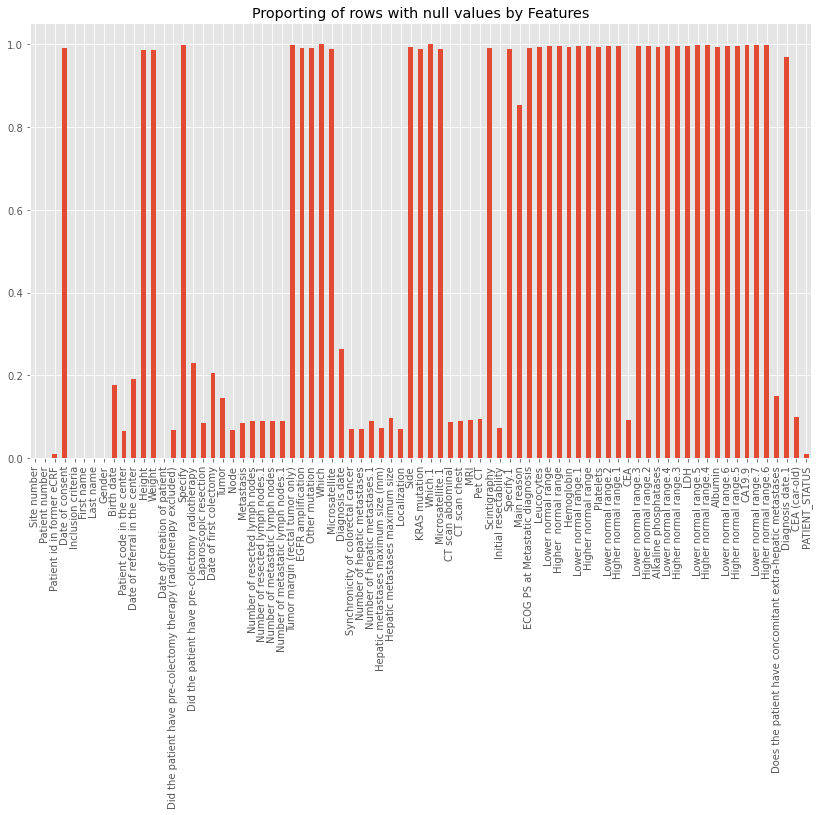

In [ ]:
plt.style.use('ggplot')

null_vals = df.isna().mean()

fig = plt.figure(figsize=(14, 8))
plt.title('Proporting of rows with null values by Features')
null_vals.plot(kind='bar')

## Handling missing values

The figure above shows that some features contain large proportion of missing values. Since it is impossible to extract values from such columns, the features that have most of the values missing will be dropped (as a rule of thumb, we're setting the threshold at 0.4, i.e. 40% of missing values)

In [ ]:
df = df.drop(columns=null_vals[null_vals > 0.4].index)

# In addition, features related to patients' personal information
# will be dropped as they do not give insights about patients' medical history

df = df.drop(columns=['First name', 'Last name', 'Patient number', 'Patient id in former eCRF', 'Patient code in the center'])

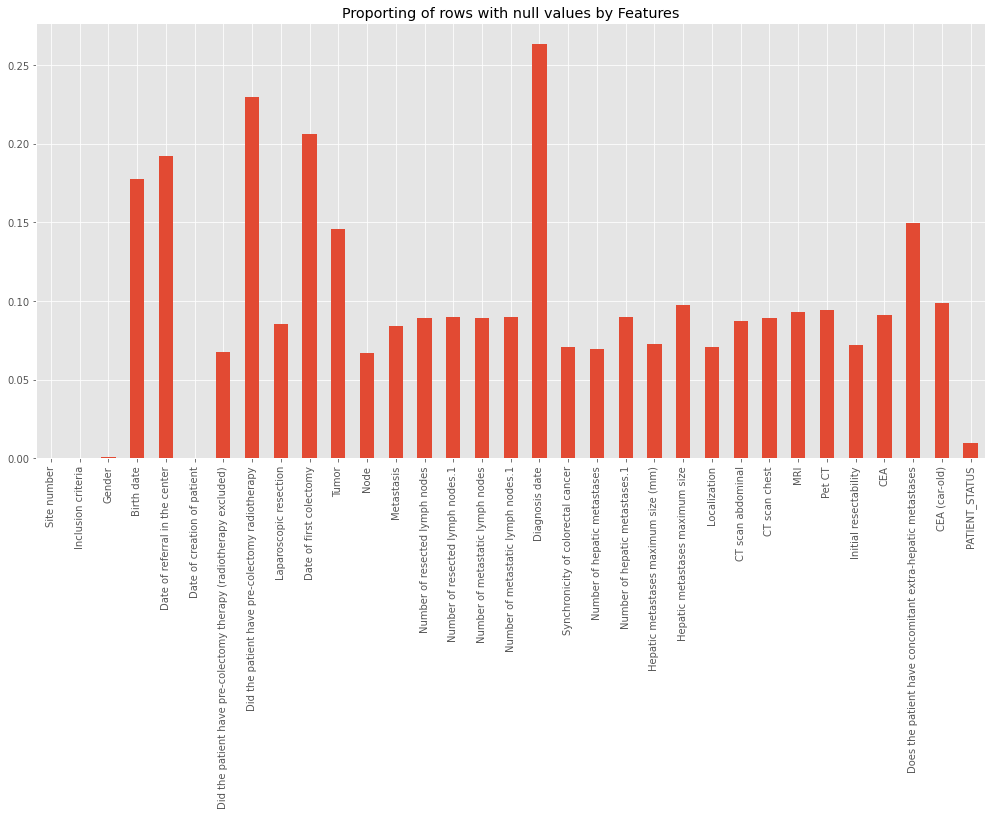

In [ ]:
null_vals = df.isna().sum() / df.shape[0]

fig = plt.figure(figsize=(17, 8))
plt.title('Proporting of rows with null values by Features')
null_vals.plot(kind='bar')

### Target variable

In [ ]:
print(df['PATIENT_STATUS'].unique())

df = df.dropna(subset=['PATIENT_STATUS']) #Drop missing values in the target variable
df = df.drop(df[df['PATIENT_STATUS'] == 'Lost to follow-up'].index) #Drop category that does not provide useful information

print("After cleaning")
print(df['PATIENT_STATUS'].unique())

['Deceased' 'Alive' nan 'Lost to follow-up']
After cleaning
['Deceased' 'Alive']


In [ ]:
for col in df[null_vals[null_vals > 0].index]:
  print("Describe \n")
  print(df[col].describe())
  print("Value Counts \n")
  print(df[col].value_counts())
  print("_________________ \n")

Describe 

count     4359
unique       2
top        Yes
freq      4356
Name: Inclusion criteria, dtype: object
Value Counts 

Yes    4356
No        3
Name: Inclusion criteria, dtype: int64
_________________ 

Describe 

count     4357
unique       2
top       Male
freq      2732
Name: Gender, dtype: object
Value Counts 

Male      2732
Female    1625
Name: Gender, dtype: int64
_________________ 

Describe 

count                    3575
unique                   3174
top       1935-02-10 00:00:00
freq                        4
first     1914-08-01 00:00:00
last      1995-09-15 00:00:00
Name: Birth date, dtype: object
Value Counts 

1935-02-10    4
1940-02-24    4
1944-08-03    4
1947-05-26    4
1948-10-28    4
             ..
1923-12-12    1
1944-05-03    1
1953-11-05    1
1946-12-30    1
1965-11-12    1
Name: Birth date, Length: 3174, dtype: int64
_________________ 

Describe 

count                    3511
unique                   2050
top       2007-01-22 00:00:00
freq                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of panda

count     3978
unique       3
top        Yes
freq      2728
Name: CT scan chest, dtype: object
Value Counts 

Yes    2728
ND      891
No      359
Name: CT scan chest, dtype: int64
_________________ 

Describe 

count     3961
unique       3
top        Yes
freq      1879
Name: MRI, dtype: object
Value Counts 

Yes    1879
No     1534
ND      548
Name: MRI, dtype: int64
_________________ 

Describe 

count     3954
unique       3
top         No
freq      1841
Name: Pet CT, dtype: object
Value Counts 

No     1841
Yes    1168
ND      945
Name: Pet CT, dtype: int64
_________________ 

Describe 

count     4056
unique       3
top        Yes
freq      2474
Name: Initial resectability, dtype: object
Value Counts 

Yes    2474
ND      918
No      664
Name: Initial resectability, dtype: int64
_________________ 

Describe 

count     3976
unique     906
top         ND
freq      1933
Name: CEA, dtype: object
Value Counts 

ND      1933
3         30
2         24
1         21
1.9       20
        .

## Converting string to numeric
From the above, we can observe that some features are numeric, but stored as string due to string values such as, e.g. ND. These columns need to be converted to numeric

`Number of hepatic metastases` contains 46 unique values where most of the values are numeric except a few. These values are possibly due to entry errors or inconsistent format of data entry. There are also some values that have special symbols together with numbers.
This type of inconsistencies needs to be handled by removing special characters as well converting the entire column to numeric. This would imply that values containing strings will be converted to NaN.




In [ ]:
import re

cols_to_numeric = ['Number of hepatic metastases', 
                   'Number of hepatic metastases.1', 
                   'Hepatic metastases maximum size (mm)', 
                   'Hepatic metastases maximum size',
                   'CEA',
                   'Number of metastatic lymph nodes.1', 
                   'Number of resected lymph nodes',
                   'CEA (car-old)', 
                   'Number of resected lymph nodes.1', 
                   'Number of metastatic lymph nodes'
]

# Remove all special characters
for col in cols_to_numeric:
  df[col] = df[col].apply(lambda x: re.sub('[^0-9]+', '', str(x)))
df = df.replace(r'^\s*$', np.nan, regex=True)

df[cols_to_numeric] = df[cols_to_numeric].astype(float)


In [ ]:
# Checking for duplicates
print(df[df.duplicated(subset=None, keep=False)])

# There's only one duplicate record. This will be dropped
df = df.drop_duplicates()

      Site number Inclusion criteria  ... CEA (car-old) PATIENT_STATUS
3844           59                Yes  ...           NaN          Alive
3900           59                Yes  ...           NaN          Alive

[2 rows x 33 columns]


In [ ]:
print(df.shape)
print(df.dropna().shape)

(4359, 33)
(775, 33)


Dropping all rows with missing values is not feasible as this will significantly reduce the dataset (from 4359 to 1432 rows). Therefore, other options need to be explored

## Handling datetypes

In [ ]:
# Convert date columns to datetime datatype to make it easier extract extra features
date_cols = df.columns[df.columns.str.contains('date|Date')]
for date_col in date_cols:
  df.loc[:, date_col] = pd.to_datetime(df[date_col])


In [ ]:
# Split dates into 3 features: Year, month and day
for col in date_cols:
  df['{}_year'.format(col)] = df[col].dt.year
  df['{}_month'.format(col)] = df[col].dt.month
  df['{}_day'.format(col)] = df[col].dt.day
  df = df.drop(columns=[col]) # Remove original column

new_date_cols = df.columns[df.columns.str.contains('_year|_month|_day')]

In [ ]:
# Checking for imbalance
print( f'''
Checking for imbalance ... \n
Counts:  
{df.groupby('PATIENT_STATUS')['PATIENT_STATUS'].count()} \n

Percentages: 
{df.groupby('PATIENT_STATUS')['PATIENT_STATUS'].count() / df.shape[0]}
''')

# The dataset is balanced


Checking for imbalance ... 

Counts:  
PATIENT_STATUS
Alive       2343
Deceased    2016
Name: PATIENT_STATUS, dtype: int64 


Percentages: 
PATIENT_STATUS
Alive       0.537509
Deceased    0.462491
Name: PATIENT_STATUS, dtype: float64



In [ ]:
!pip install miceforest

     |████████████████████████████████| 69 kB 5.0 MB/s 
     |████████████████████████████████| 2.0 MB 30.8 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


## Data Imputation

Multivariate imputation by chained equations (MICE), one of the most prominent multiple imputation procedures, assumes that the missing data is Missing At Random which implies that the likelihood of presence of missing values is only dependent on observed values. MICE method applies a series of regression models where each missing data variable is modelled depending on other variables. Hence, each feature can be modelled as per its distribution where continuous features are modelled using linear regression and categorical features using logistic regression, for example. 
The chained equation procedure can be generally described as per below steps:
1.	A single imputation is first applied for each missing value. These simple imputations can be referred as ‘Placeholders’
2.	The previously defined ‘Placeholders’ for one feature are set to missing again. For explanation purposes, a dummy variable β is being introduced.
3.	The regression analysis is performed on β defined in previous step where β acts as the outcome variable whereas other variables are explanatory variables.
4.	The missing values of β are replaced with predicted values coming from regression analysis. It is worth mentioning that both the observed and newly imputed values are used when β is subsequently employed as predictor variable. 
5.	Steps 2 to 4 are iterated for every variable with missing values. The iteration through each variable defines one cycle. When one cycle is completed, all of the missing values would be imputed with regression model’s predictions
6.	Steps 2 to 4 are then repeated for defined number of iterations where the imputation are updated at each iteration
Typically, the optimal number of iterations (cycles) is between 20 to 100, however, even a relatively low number of iterations (typically in the range of 10 to 20) is often sufficient (10.18637/jss.v045.i03). 


In [ ]:
import miceforest as mf

kernel = mf.ImputationKernel(
  df[cols_to_numeric],
  datasets=20,
  save_all_iterations=True,
  random_state=1
)


print(kernel)

completed_dataset = kernel.complete_data(dataset=1, inplace=False)
df[cols_to_numeric] = completed_dataset

# Check if there are still missing values
print(df[cols_to_numeric].isnull().sum())

              Class: ImputationKernel
           Datasets: 20
         Iterations: 0
  Imputed Variables: 10
save_all_iterations: True
Number of hepatic metastases            0
Number of hepatic metastases.1          0
Hepatic metastases maximum size (mm)    0
Hepatic metastases maximum size         0
CEA                                     0
Number of metastatic lymph nodes.1      0
Number of resected lymph nodes          0
CEA (car-old)                           0
Number of resected lymph nodes.1        0
Number of metastatic lymph nodes        0
dtype: int64


In [ ]:
new_date_cols = df.columns[df.columns.str.contains('_year|_month|_day')]

# Imputing datetype columns
kernel = mf.ImputationKernel(
  df[new_date_cols],
  datasets=20,
  save_all_iterations=True,
  random_state=1
)

print(kernel)

completed_dataset = kernel.complete_data(dataset=1, inplace=False)
df[new_date_cols] = completed_dataset

              Class: ImputationKernel
           Datasets: 20
         Iterations: 0
  Imputed Variables: 12
save_all_iterations: True


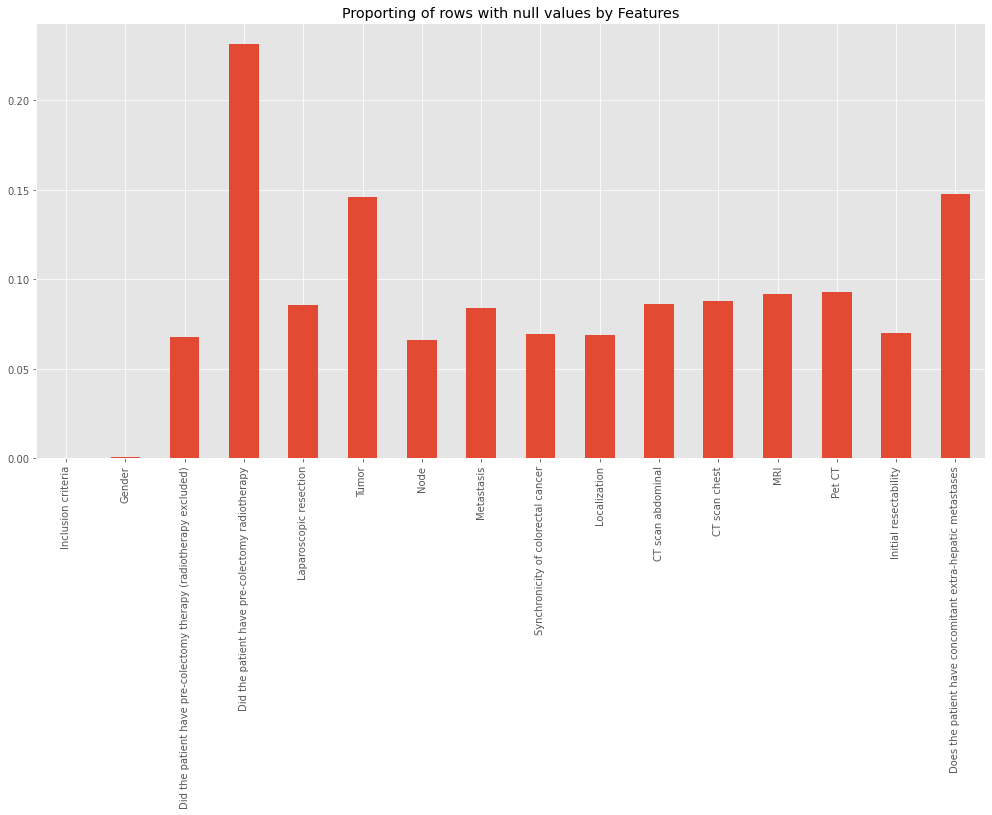

In [ ]:
null_vals = df.isna().mean()
null_vals = null_vals[null_vals > 0]
fig = plt.figure(figsize=(17, 8))
plt.title('Proporting of rows with null values by Features')
null_vals.plot(kind='bar')

We are only left with categorical data


In [ ]:
categorical_columns = [
                       'Inclusion criteria',
                        'Gender', 
                        'Did the patient have pre-colectomy therapy (radiotherapy excluded)',	
                        'Did the patient have pre-colectomy radiotherapy',
                        'Laparoscopic resection',
                        'Tumor',
                        'Node',
                        'Metastasis',
                        'Synchronicity of colorectal cancer',
                        'Localization',
                        'CT scan abdominal',
                        'CT scan chest',
                        'MRI',
                        'Pet CT',
                        'Initial resectability',
                        'Does the patient have concomitant extra-hepatic metastases'
]

# Convert to categorical to be able to run MICE
df[categorical_columns] = df[categorical_columns].astype('category')

# Imputing categorical columns
kernel = mf.ImputationKernel(
  df[categorical_columns],
  datasets=20,
  save_all_iterations=True,
  random_state=1
)

print(kernel)

completed_dataset = kernel.complete_data(dataset=2, inplace=False)
df[categorical_columns] = completed_dataset

              Class: ImputationKernel
           Datasets: 20
         Iterations: 0
  Imputed Variables: 16
save_all_iterations: True


In [ ]:
# Convert target variable into numerical: 
# 1 means patient has liver cancer and 0 for negative cancer

df['PATIENT_STATUS'] = df['PATIENT_STATUS'].replace({'Deceased': 1, 'Alive': 0})

# One-Hot encoding to convert all categorical data into numerical
df = pd.get_dummies(df)

## Outlier detection and elimination

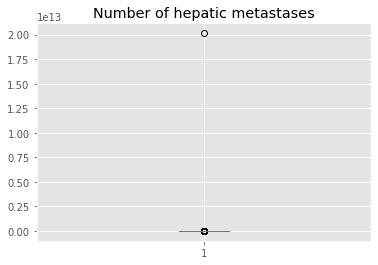

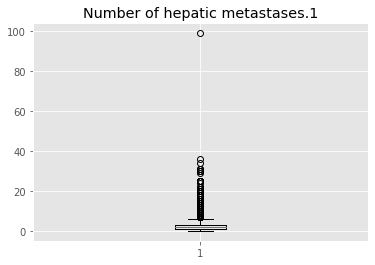

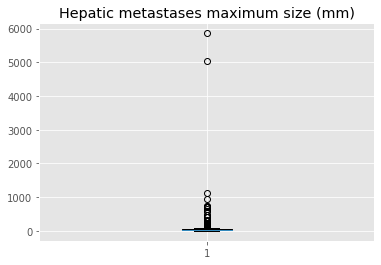

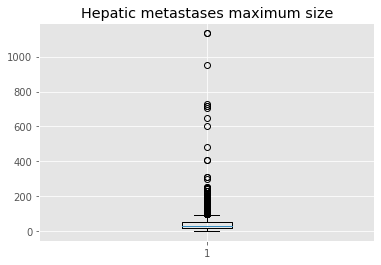

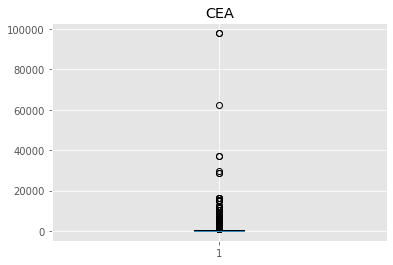

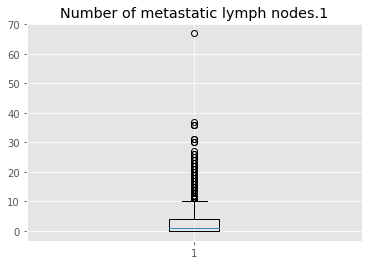

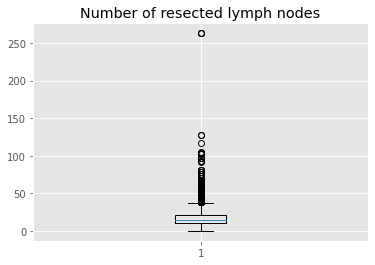

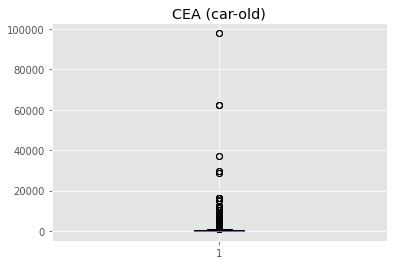

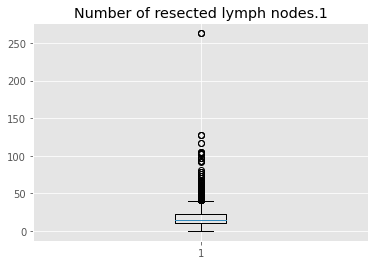

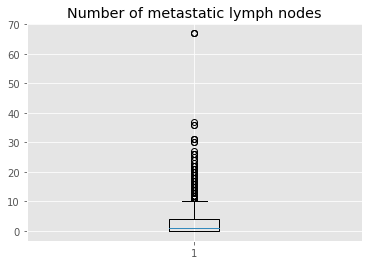

In [ ]:
# plt.figure(figsize=(12, 9))
plt.style.use('ggplot')

for col in df[cols_to_numeric]:
  plt.boxplot(df[col].dropna().values)
  plt.title(col)
  plt.show()

The boxplot clear illustrates that there is an outlier present in `Number of hepatic metastases` column. We will apply algorithms for outlier detection and elimination.


# Testing on a model

In [ ]:
# Splitting Data
# Split dataset into training set and test set
# 80% training and 20% test

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

dataset = df

# Preprocessing
X = dataset.drop(columns=['PATIENT_STATUS'])
y = dataset['PATIENT_STATUS']


In [ ]:
# Splitting Data
# Split dataset into training set and test set
# 80% training and 20% test

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109) 

X_train = X
y_train = y

In [ ]:
#Feature scaling
# Scale numeric value for normalization 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#sc_X = RobustScaler()
X_train = StandardScaler().fit_transform(X_train)
#X_test = sc_X.transform(X_test)

print(X_train)
#print(X_test)

[[ 0.16329343 -0.46690771 -0.24900791 ...  0.7995862   0.32394902
  -0.32394902]
 [ 0.16329343 -0.53954594 -1.01173182 ...  0.7995862   0.32394902
  -0.32394902]
 [ 0.16329343 -0.46690771  0.09768478 ... -1.25064689  0.32394902
  -0.32394902]
 ...
 [-0.46111952 -1.26592829 -0.31834645 ... -1.25064689  0.32394902
  -0.32394902]
 [-0.46111952  1.27640992  1.20710139 ...  0.7995862   0.32394902
  -0.32394902]
 [-0.46111952 -0.32163124 -0.52636206 ... -1.25064689  0.32394902
  -0.32394902]]


# Before Feature selection (SVM XGBoost Naive Bayes)

In [ ]:
#Importing required libraries
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm

#Implementing cross validation
k = 5
seed = 109
kf = KFold(n_splits=k, random_state=seed, shuffle=True)

#Create Classifiers
models = {
    'xgb_clf': XGBClassifier(random_state=seed),
    'nb_clf': BernoulliNB(),
    'svm_clf': svm.SVC(kernel='linear', random_state=seed)
    }

def confusion_matrix_scorer(clf, X, y):
     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}

scorings = ['accuracy', 'f1', 'precision', 'recall']

results = {}
results_scoring = {}
for name, model in models.items():
  results[name] = list(cross_val_score(model, X, y, cv=kf))
  print(name, np.mean(results[name]))

  results_scoring[name] = {}
  for scoring in scorings:
    results_scoring[name][scoring] = {}
    results_scoring[name][scoring]['cv_score'] = list(cross_val_score(model, X, y, scoring = scoring, cv=kf))
    results_scoring[name][scoring]['mean'] = np.mean(results_scoring[name][scoring]['cv_score'])
    results_scoring[name][scoring]['std'] = np.std(results_scoring[name][scoring]['cv_score'])
  
  results_scoring[name]['confusion_matrix'] = cross_validate(model, X, y, scoring = confusion_matrix_scorer, cv=kf)

print(results)
print(results_scoring)

xgb_clf 0.7529245094218392
nb_clf 0.6219401405112757


[Text(0, 0.5, 'accuracy'),
 Text(0.5, 1.0, 'Cross validation score(Before feature selection)')]

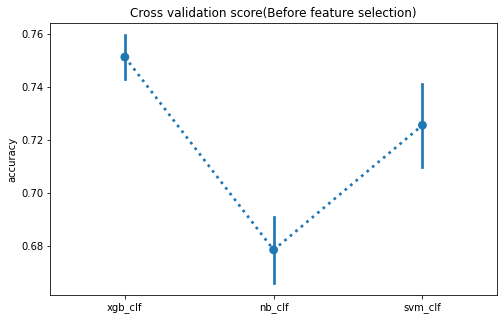

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot showing the Cross Validation score

results_df = pd.DataFrame(results)

fig = plt.figure(figsize=(8, 5))
p = sns.pointplot(data=results_df, ci='sd', dodge=0.25, linestyles='dotted')
p.set(ylabel='accuracy', title='Cross validation score(Before feature selection)')

# After Feature selection

In [ ]:
# Splitting the selected features Data
# Split dataset into training set and test set
# 80% training and 20% test

from sklearn.model_selection import train_test_split


selected_features = ['Pet CT_Yes', 'Localization_Unilateral', 'Initial resectability_No', 'Date of creation of patient_day', 'Date of referral in the center_year', 'Date of first colectomy_year', 'Diagnosis date_year', 'Birth date_year', 'Node_N2', 'MRI_No', 'Date of creation of patient_month']


#X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=109) 

X_selected_train = X[selected_features]
y_selected_train = y
#Feature scaling
# Scale numeric value for normalization 
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_selected_train = sc_X.fit_transform(X_selected_train)
#X_selected_test = sc_X.transform(X_selected_test)

print(X_selected_train.shape)
#print(X_selected_test.shape)

(4359, 11)


In [ ]:
#Importing required libraries
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm

#Implementing cross validation
k = 5
seed = 109
kf = KFold(n_splits=k, random_state=seed, shuffle=True)

#Create Classifiers
models = {
    'xgb_clf': XGBClassifier(random_state=seed),
    'nb_clf': BernoulliNB(),
    'svm_clf': svm.SVC(kernel='linear', random_state=seed)
    }

def confusion_matrix_scorer(clf, X, y):
     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}

scorings = ['accuracy', 'f1', 'precision', 'recall']

results = {}
results_scoring = {}
for name, model in models.items():
  results[name] = list(cross_val_score(model, X_selected_train, y_selected_train, cv=kf))
  print(name, np.mean(results[name]))

  results_scoring[name] = {}
  for scoring in scorings:
    results_scoring[name][scoring] = {}
    results_scoring[name][scoring]['cv_score'] = list(cross_val_score(model, X_selected_train, y_selected_train, scoring = scoring, cv=kf))
    results_scoring[name][scoring]['mean'] = np.mean(results_scoring[name][scoring]['cv_score'])
    results_scoring[name][scoring]['std'] = np.std(results_scoring[name][scoring]['cv_score'])
  
  results_scoring[name]['confusion_matrix'] = cross_validate(model, X_selected_train, y_selected_train, scoring = confusion_matrix_scorer, cv=kf)

print(results)
print(results_scoring)

xgb_clf 0.7398458483868589
nb_clf 0.721491694667102
svm_clf 0.7226416435816682
{'xgb_clf': [0.7614678899082569, 0.7259174311926605, 0.7350917431192661, 0.7488532110091743, 0.7278989667049368], 'nb_clf': [0.7431192660550459, 0.7075688073394495, 0.7282110091743119, 0.7247706422018348, 0.703788748564868], 'svm_clf': [0.7419724770642202, 0.7041284403669725, 0.7213302752293578, 0.7282110091743119, 0.7175660160734788]}
{'xgb_clf': {'accuracy': {'cv_score': [0.7614678899082569, 0.7259174311926605, 0.7350917431192661, 0.7488532110091743, 0.7278989667049368], 'mean': 0.7398458483868589, 'std': 0.01347572309982499}, 'f1': {'cv_score': [0.7463414634146343, 0.7217694994179279, 0.7213510253317251, 0.735826296743064, 0.719526627218935], 'mean': 0.7289629824252573, 'std': 0.010467564884666767}, 'precision': {'cv_score': [0.7355769230769231, 0.7142857142857143, 0.696969696969697, 0.7011494252873564, 0.672566371681416], 'mean': 0.7041096262602213, 'std': 0.020729022292186167}, 'recall': {'cv_score': [0

[Text(0, 0.5, 'accuracy'),
 Text(0.5, 1.0, 'Cross validation score(After feature selection)')]

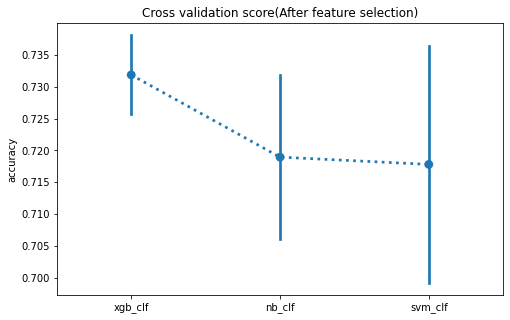

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot showing the Cross Validation score

results_df = pd.DataFrame(results)

fig = plt.figure(figsize=(8, 5))
p = sns.pointplot(data=results_df, ci='sd', dodge=0.25, linestyles='dotted')
p.set(ylabel='accuracy', title='Cross validation score(After feature selection)')

# Parameter Tuning

## SVM

In [ ]:
# Sensitivity, Specificity, Precision, Recall, F1 and Confusion Matrix

from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
svm_tuned_parameters = [{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 20, 50, 100, 1000]}]

grid = GridSearchCV(svm.SVC(random_state=seed), svm_tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_selected_train, y_selected_train)

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, grid.cv_results_['params']):
  #print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    


0.538 (+/-0.001) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
0.714 (+/-0.030) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.582 (+/-0.010) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.714 (+/-0.030) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.582 (+/-0.010) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.727 (+/-0.026) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.722 (+/-0.022) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.716 (+/-0.023) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.584 (+/-0.009) for

In [ ]:
print("best_params_:")
print(grid.best_params_)

print("best_estimator_:")
print(grid.best_estimator_)

best_params_:
{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
best_estimator_:
SVC(C=50, gamma=0.01)


## XGBoost

In [ ]:
# A parameter grid for XGBoost

xgboost_tuned_parameters = {
    'max_depth': range (1, 3, 5),
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.05]
}

grid = GridSearchCV(XGBClassifier(random_state=seed), xgboost_tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_selected_train, y_selected_train)

print("XGBoost : best_params_:")
print(grid.best_params_)

print("XGBoost : best_estimator_:")
print(grid.best_estimator_)

XGBoost : best_params_:
{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
XGBoost : best_estimator_:
XGBClassifier(max_depth=1, random_state=109)


# After parameter tuning

In [ ]:
#Importing required libraries
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm

#Implementing cross validation
k = 5
seed = 109
kf = KFold(n_splits=k, random_state=seed, shuffle=True)

#Create Classifiers
models = {
    'xgb_clf': XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 100, random_state=seed),
    'nb_clf': BernoulliNB(),
    'svm_clf': svm.SVC(kernel='rbf', C=50, gamma=0.01, random_state=seed)
    }


def confusion_matrix_scorer(clf, X, y):
     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}

scorings = ['accuracy', 'f1', 'precision', 'recall']

results = {}
results_scoring = {}
for name, model in models.items():
  results[name] = list(cross_val_score(model, X_selected_train, y_selected_train, cv=kf))
  print(name, np.mean(results[name]))

  results_scoring[name] = {}
  for scoring in scorings:
    results_scoring[name][scoring] = {}
    results_scoring[name][scoring]['cv_score'] = list(cross_val_score(model, X_selected_train, y_selected_train, scoring = scoring, cv=kf))
    results_scoring[name][scoring]['mean'] = np.mean(results_scoring[name][scoring]['cv_score'])
    results_scoring[name][scoring]['std'] = np.std(results_scoring[name][scoring]['cv_score'])
  
  results_scoring[name]['confusion_matrix'] = cross_validate(model, X_selected_train, y_selected_train, scoring = confusion_matrix_scorer, cv=kf)

print(results)
print(results_scoring)

xgb_clf 0.7409963239553818
nb_clf 0.721491694667102
svm_clf 0.7393889760793773
{'xgb_clf': [0.7465596330275229, 0.7259174311926605, 0.7454128440366973, 0.7431192660550459, 0.7439724454649828], 'nb_clf': [0.7431192660550459, 0.7075688073394495, 0.7282110091743119, 0.7247706422018348, 0.703788748564868], 'svm_clf': [0.7477064220183486, 0.7224770642201835, 0.7396788990825688, 0.7511467889908257, 0.7359357060849598]}
{'xgb_clf': {'accuracy': {'cv_score': [0.7465596330275229, 0.7259174311926605, 0.7454128440366973, 0.7431192660550459, 0.7439724454649828], 'mean': 0.7409963239553818, 'std': 0.00763142511997484}, 'f1': {'cv_score': [0.7301587301587301, 0.7144563918757467, 0.7272727272727273, 0.7220843672456577, 0.7296969696969696], 'mean': 0.7247338372499662, 'std': 0.005884788594835447}, 'precision': {'cv_score': [0.7204819277108434, 0.7257281553398058, 0.714975845410628, 0.7063106796116505, 0.6967592592592593], 'mean': 0.7128511734664376, 'std': 0.010298417995903019}, 'recall': {'cv_score':

[Text(0, 0.5, 'accuracy'),
 Text(0.5, 1.0, 'Cross validation score(After parameter tuning)')]

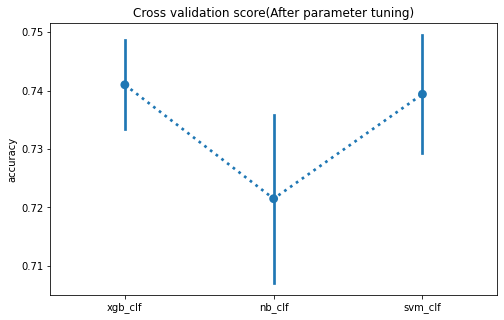

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot showing the Cross Validation score

results_df = pd.DataFrame(results)

fig = plt.figure(figsize=(8, 5))
p = sns.pointplot(data=results_df, ci='sd', dodge=0.25, linestyles='dotted')
p.set(ylabel='accuracy', title='Cross validation score(After parameter tuning)')

# Convert ipynb to HTML

In [ ]:
# install nbconvert
!pip install nbconvert
# convert ipynb to html
# file name: "/content/CN_7050_Coursework.ipynb"
!jupyter nbconvert --to html CN_7050_Coursework.ipynb

[NbConvertApp] Converting notebook CN_7050_Coursework.ipynb to html
[NbConvertApp] Writing 855482 bytes to CN_7050_Coursework.html
